## Analyzing a sale dataset of properties extracted from the website immoweb.be.
The project involves cleaning the dataset, performing exploratory data analysis, and creating visualizations. 

study is done by Fatemeh Loni

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

Cleaning the data set and saving the cleaned data as a csv file for the further investigation. 

In [18]:
def cleaning_data(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    # Reset the index
    df.reset_index(drop=True, inplace=True)

    # Fill missing values in 'Garden_area' column with 0
    df['Garden_area'].fillna(0, inplace=True)

    # fill missing values in "Garden" column with False
    # change the data type of "Garden" to  the "bool"
    df['Garden'] = df['Garden'].fillna(False)
    df['Garden'] = df['Garden'].astype(bool)


    # Fill missing values in 'Surface_of_land' column with 0
    df['Surface_of_land'].fillna(0, inplace=True)

    # Fill missing values in 'Facade' column with 2
    df['Facade'].fillna(2, inplace=True)

    # remove some rows and reset the index
    df.drop([4679, 7825], inplace=True)
    df.reset_index(drop=True, inplace=True)

    # romove some rows because their info is vague
    missing_values = df['Bedroom'].isnull()
    my_index= df.index[missing_values].tolist()
    df.drop(my_index, inplace=True)
    df.reset_index(drop=True, inplace=True)

    # fill missing values in "Furnished" column with False
    # change the data type of "Furnished" to  the "bool"
    df['Furnished'] = df['Furnished'].fillna(False)
    df['Furnished'] = df['Furnished'].astype(bool)

    # change the type of "Price" to the "folat"
    df['Price'] = df['Price'].astype(float)

    # remove some rows because these house/appartment are not in Belguim
    missing_values = df['District'].isnull()
    my_index= df.index[missing_values].tolist()
    df.drop(my_index, inplace=True)
    df.reset_index(drop=True, inplace=True)

    # Delete rows where Price > 14000000
    df = df[df["Price"] <= 14000000]
    # Reset the index
    df = df.reset_index(drop=True)

    # Calculate the median living area for apartments
    apartment_median = df[df['Type'] == 'apartment']['Living_area'].median()
    # Calculate the median living area for houses
    house_median = df[df['Type'] == 'house']['Living_area'].median()
    # Fill the missing values of Living_area for apartments with the apartment median
    df.loc[(df['Type'] == 'apartment') & df['Living_area'].isnull(), 'Living_area'] = apartment_median
    # Fill the missing values of Living_area for houses with the house median
    df.loc[(df['Type'] == 'house') & df['Living_area'].isnull(), 'Living_area'] = house_median

    # Create the new "Price_per_sqm" column
    df['Price_per_sqm'] = (df['Price'] / df['Living_area']).round(2)

    # creat a list for each Belgian province consisting of its districts 
    East_Flanders=["Gent","Oudenaarde","Eeklo","Aalst","Dendermonde","Sint-Niklaas",]
    West_Flanders=["Diksmuide", "Brugge", "Diksmuide", "Kortrijk", "Oostend","Roeselare", "Tielt", "Veurne", "Ieper","Mouscron" ]
    Antwerp=["Antwerp","Turnhout","Mechelen"]
    Limburgh=["Maaseik","Hasselt","Tongeren"]
    Brussels=["Brussels"]
    Flemish_Brabant=["Leuven","Halle-Vilvoorde"]
    Walloon_Brabant=["Nivelles"]
    Liege=["Liège","Verviers","Waremme","Huy"]
    Luxemburg =["Neufchâteau","Virton","Marche-en-Famenne","Arlon","Bastogne"]  
    Namur=["Dinant","Namur","Philippeville"]
    Hainaut=["Ath","Thuin","Tournai","Soignies","Mons","Charleroi"] 


    # Create the new "province" column with default value
    df['province'] = ''
    # Update the "province" column based on the values in the "District" column
    df.loc[df['District'].isin(East_Flanders), 'province'] = 'East_Flanders'
    df.loc[df['District'].isin(West_Flanders), 'province'] = 'West_Flanders'
    df.loc[df['District'].isin(Antwerp), 'province'] = 'Antwerp'
    df.loc[df['District'].isin(Limburgh), 'province'] = 'Limburgh'
    df.loc[df['District'].isin(Brussels), 'province'] = 'Brussels'
    df.loc[df['District'].isin(Flemish_Brabant), 'province'] = 'Flemish_Brabant'
    df.loc[df['District'].isin(Walloon_Brabant), 'province'] = 'Walloon_Brabant'
    df.loc[df['District'].isin(Liege), 'province'] = 'Liege'
    df.loc[df['District'].isin(Luxemburg), 'province'] = 'Luxemburg'
    df.loc[df['District'].isin(Namur), 'province'] = 'Namur'
    df.loc[df['District'].isin(Hainaut), 'province'] = 'Hainaut'

    # Save the modified DataFrame to a new CSV file
    df.to_csv(data_dir+"cleaned_data.csv", index=False)
    return

In [19]:
cwd = os.getcwd()

# Define the path to the raw data CSV file
data_dir = os.path.join(cwd, "../data")
raw_data_file = os.path.join(data_dir, "raw-data.csv")

chart_dir=os.path.join(cwd, "../output/charts")
print(chart_dir)
# Call the cleaning_data function with the correct path
cleaning_data(raw_data_file)
# cleaning_data("raw-csv.csv")
df = pd.read_csv("cleaned_data.csv")

d:\ImmoEliza_Data_Analysis\data-exploration\../output/charts


Extracting the heat map and data matrix to study the correlation between the features. 

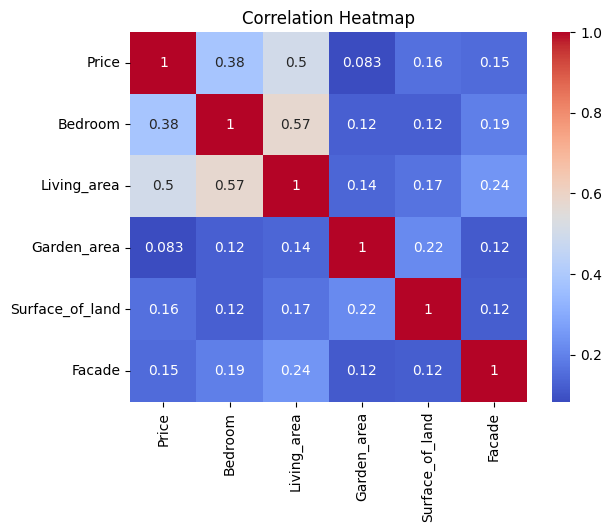

In [20]:
# Correlation Heatmap for Belguim
def Heatmap(df):

    numerical_columns = ['Price', 'Bedroom', 'Living_area', 'Garden_area', 'Surface_of_land', 'Facade']
    numerical_df = df[numerical_columns]
    correlation_matrix = numerical_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    # plt.savefig("./charts/Correlation_Heatmap",dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    return
Heatmap(df)

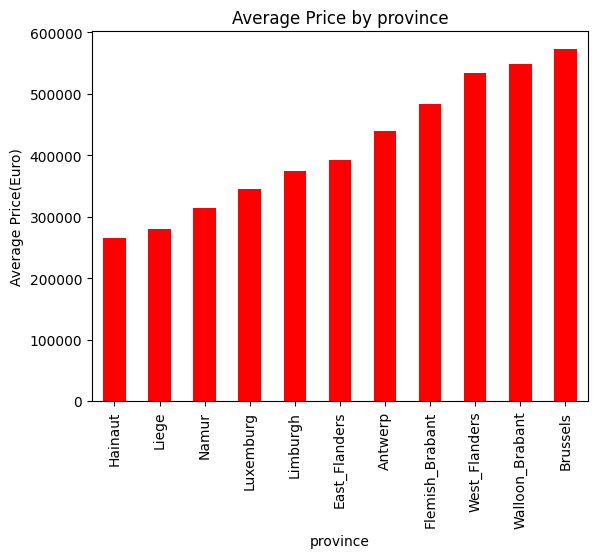

In [21]:
# create a func for the Average Price by provinces of Belguim
def PlotBar_1(df):
    categorical_column = 'province'
    numerical_column = 'Price'
    grouped_df = df.groupby(categorical_column)[numerical_column].mean()
    grouped_df = grouped_df.sort_values()
    grouped_df.plot(kind='bar' ,color='red')
    plt.xlabel(categorical_column)
    plt.ylabel('Average Price(Euro)')
    plt.title(f'Average Price by {categorical_column}')
    # plt.savefig("./charts/Average_Price_by_province",dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    return
PlotBar_1(df)

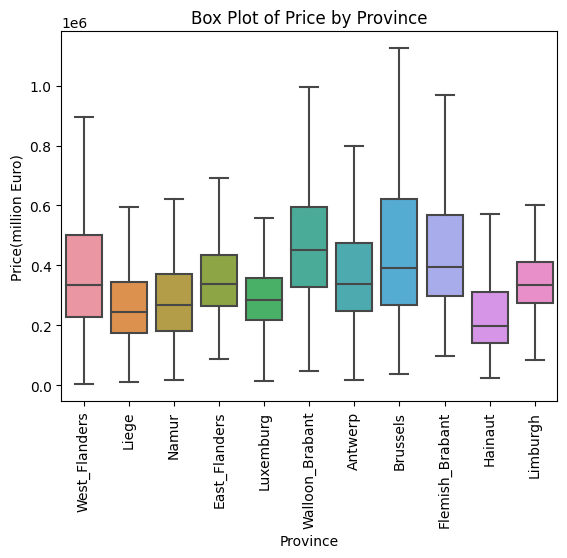

In [22]:
def Price_by_province_boxplot(df):
    # Create a box plot using seaborn
    sns.boxplot(x='province', y='Price', data=df ,sym="")
    # Set the labels and title
    plt.xlabel('Province')
    plt.ylabel('Price(million Euro)')
    plt.title('Box Plot of Price by Province')
    # Rotate x-axis labels if needed
    plt.xticks(rotation=90)
    # plt.savefig('./charts/Price_by_province_boxplot', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    return 
Price_by_province_boxplot(df)

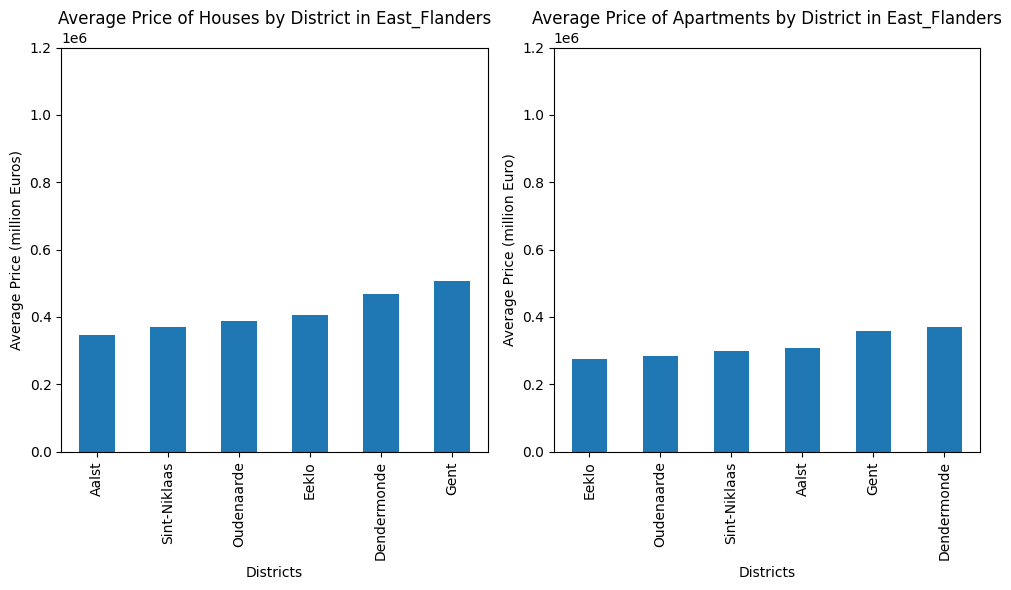

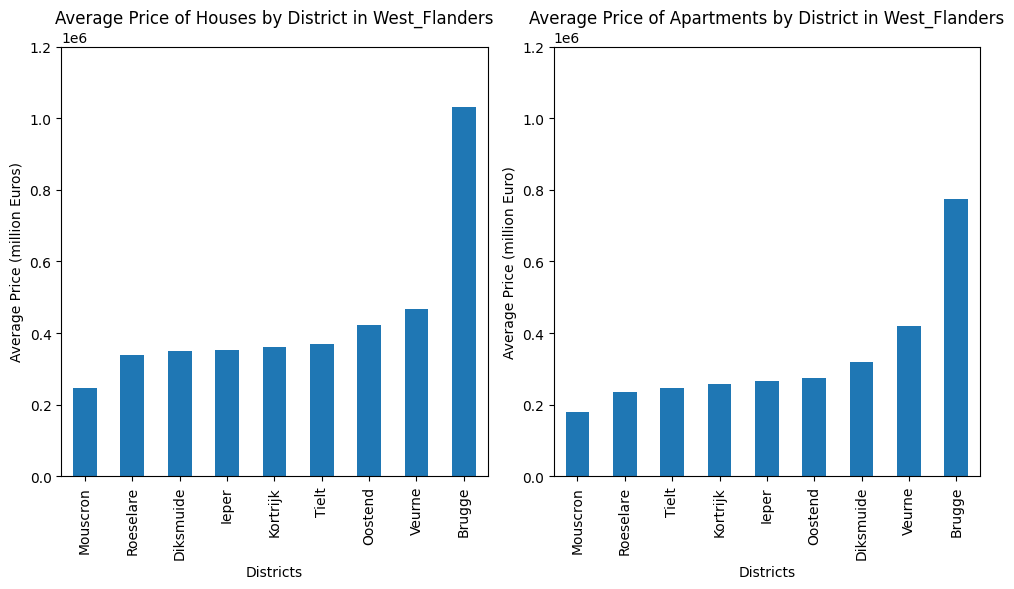

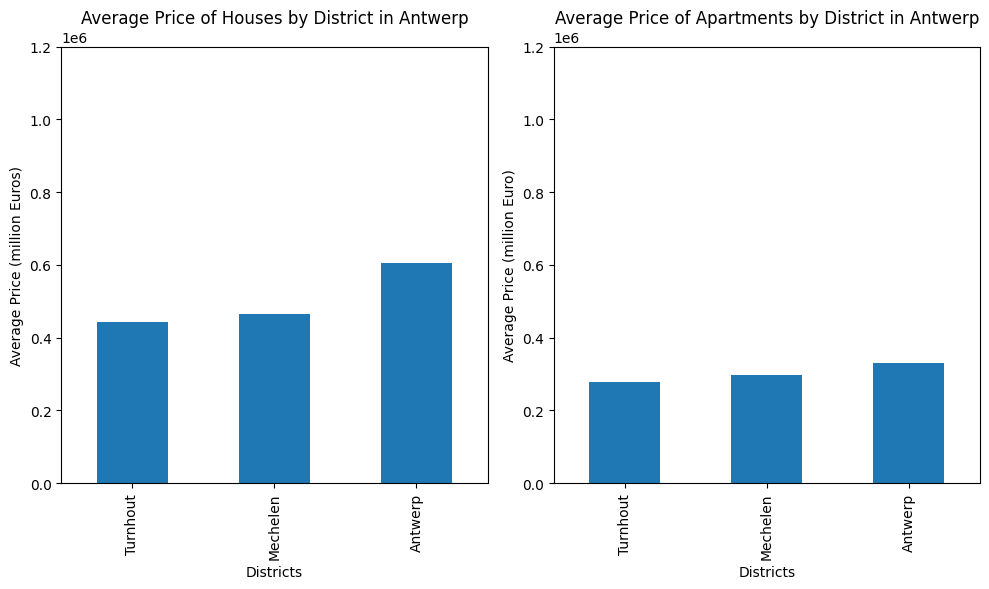

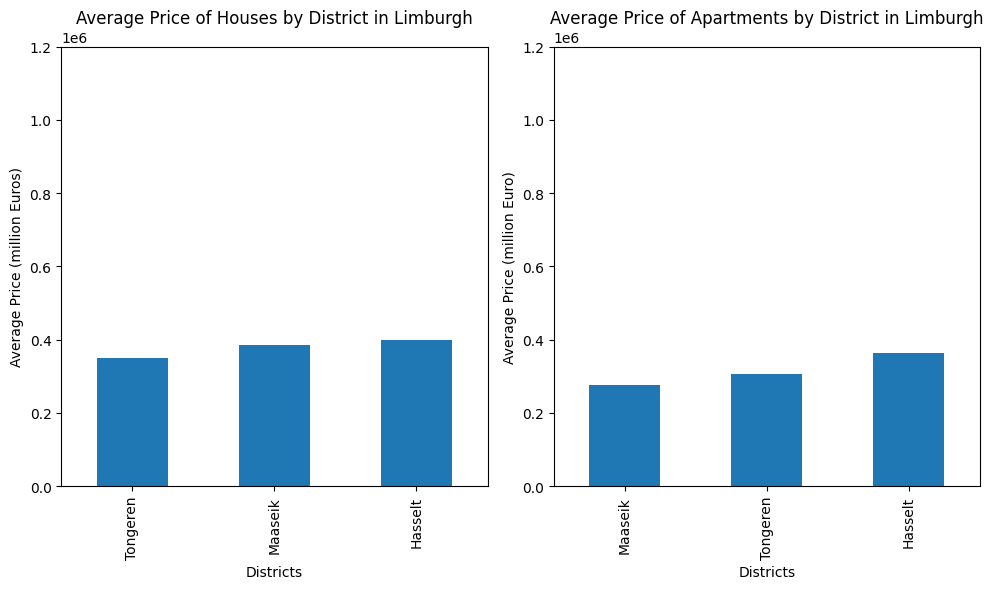

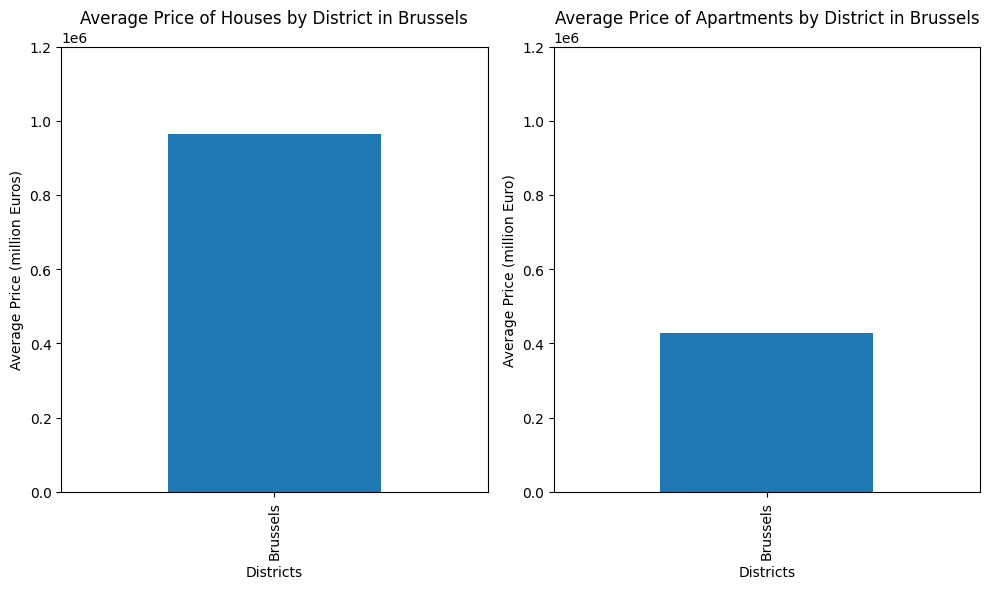

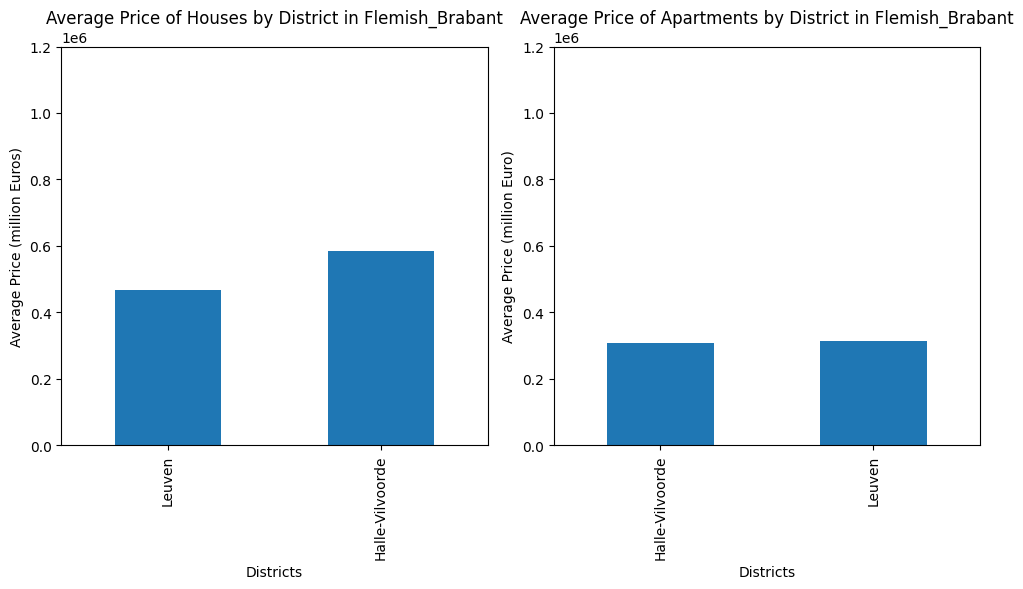

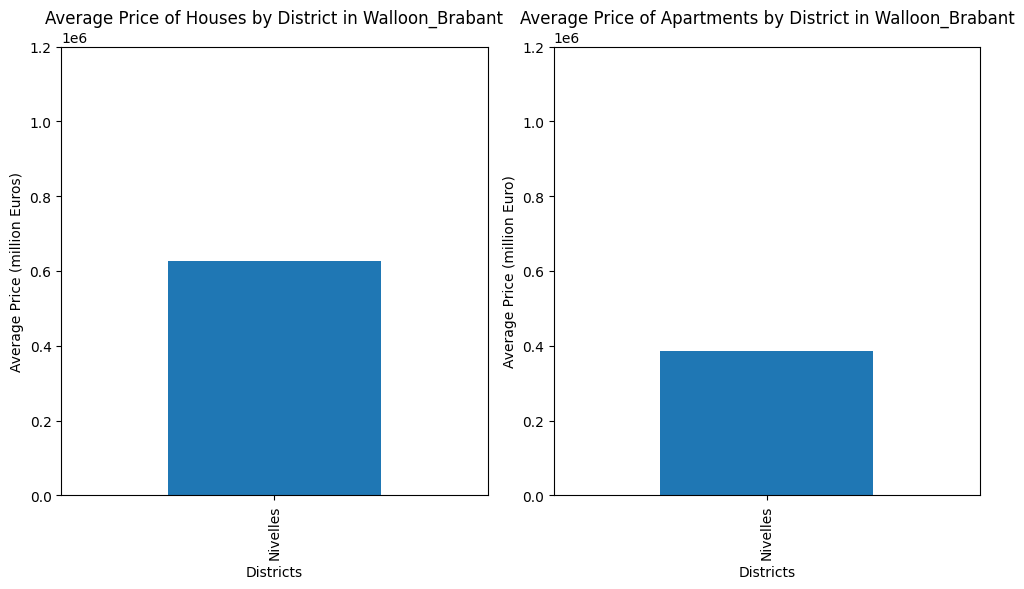

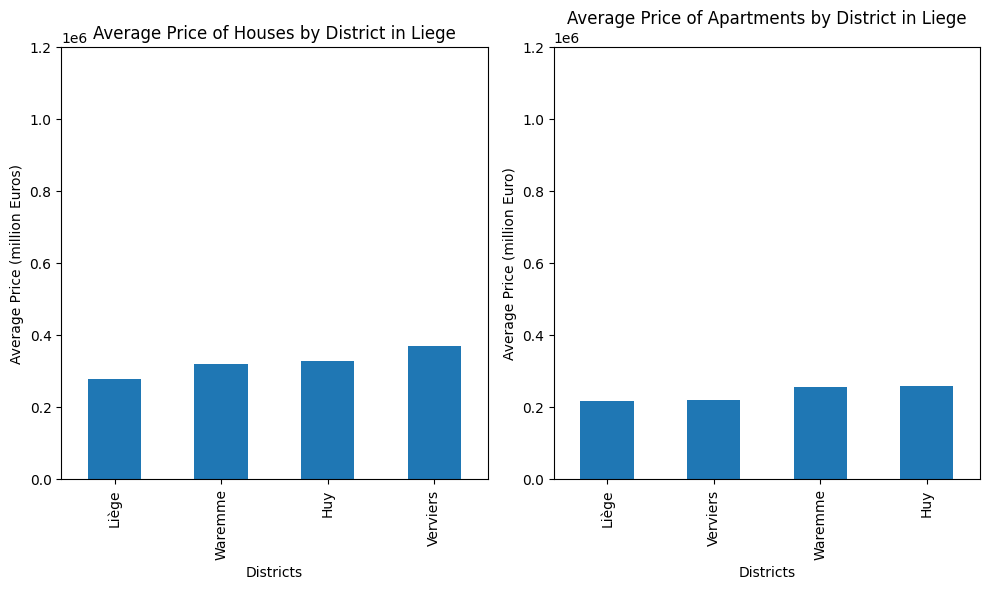

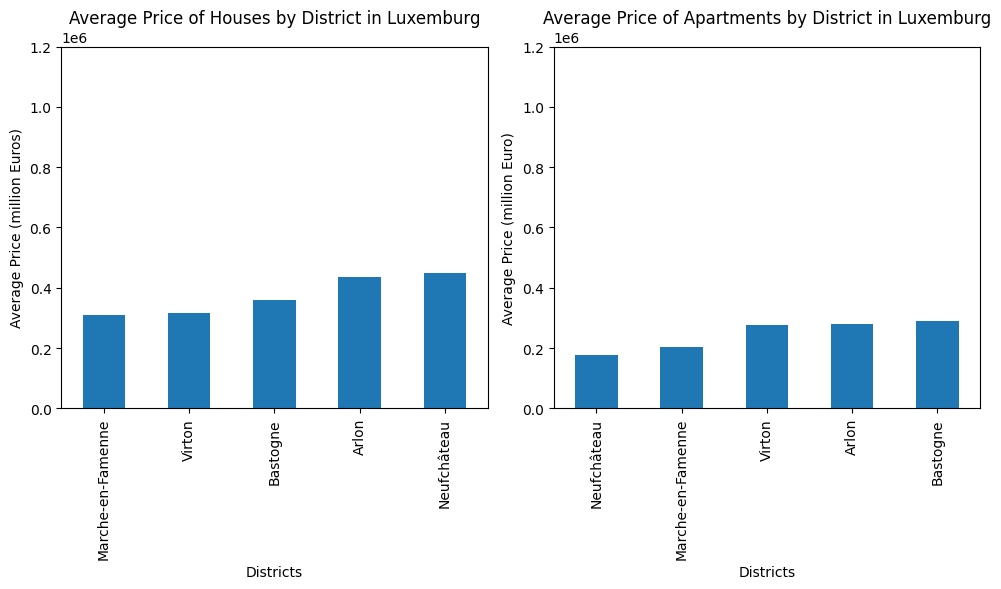

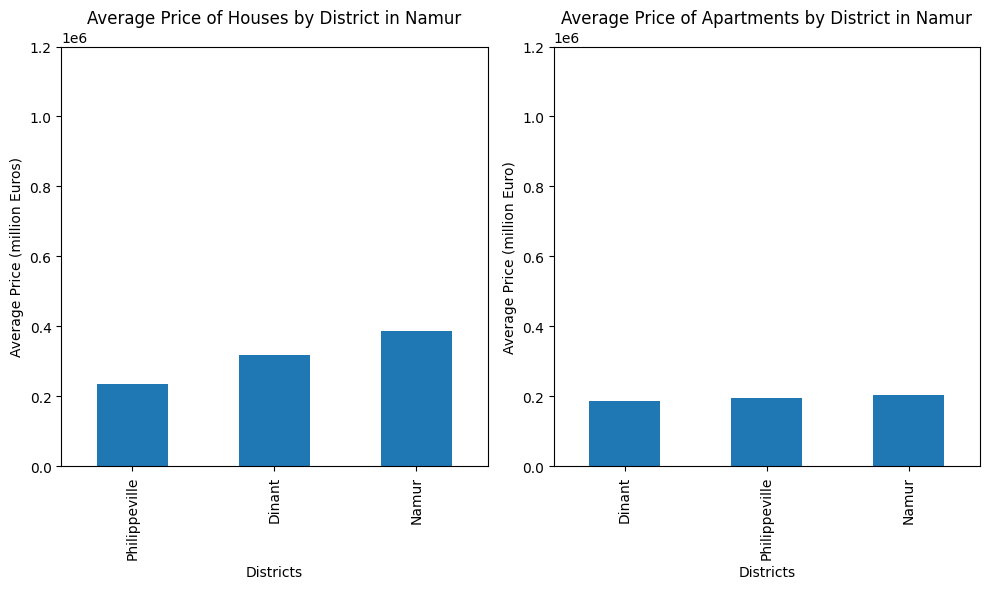

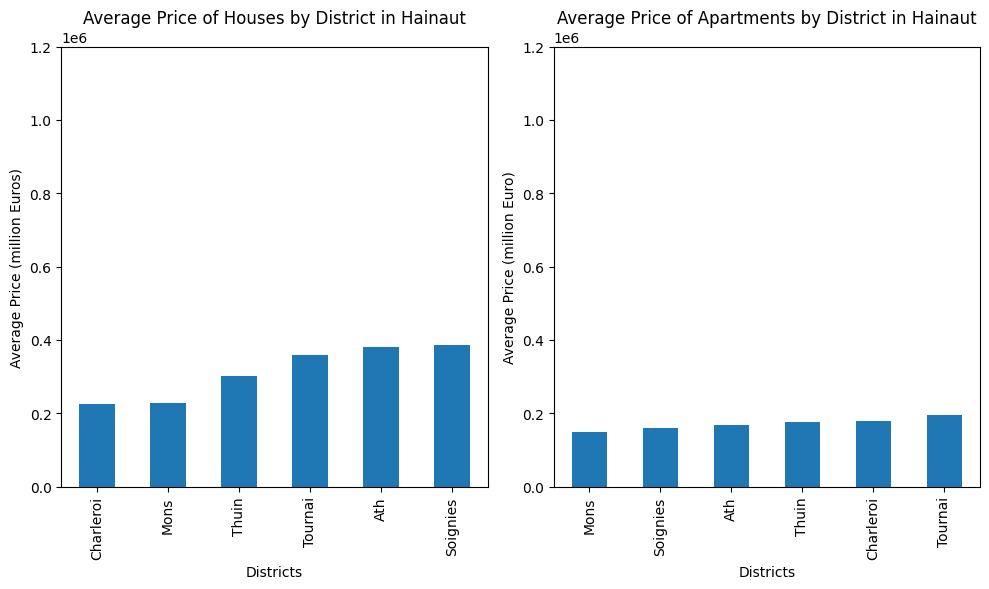

In [23]:
# create a func for the Average Price of house/apartment by District in each province
def PlotBar_2(df):
    # Define the province and its corresponding districts
    provinces=["East_Flanders","West_Flanders","Antwerp","Limburgh","Brussels","Flemish_Brabant","Walloon_Brabant","Liege","Luxemburg","Namur","Hainaut"]
    East_Flanders=["Gent","Oudenaarde","Eeklo","Aalst","Dendermonde","Sint-Niklaas",]
    West_Flanders=["Diksmuide", "Brugge", "Diksmuide", "Kortrijk", "Oostend","Roeselare", "Tielt", "Veurne", "Ieper","Mouscron" ]
    Antwerp=["Antwerp","Turnhout","Mechelen"]
    Limburgh=["Maaseik","Hasselt","Tongeren"]
    Brussels=["Brussels"]
    Flemish_Brabant=["Leuven","Halle-Vilvoorde"]
    Walloon_Brabant=["Nivelles"]
    Liege=["Liège","Verviers","Waremme","Huy"]
    Luxemburg =["Neufchâteau","Virton","Marche-en-Famenne","Arlon","Bastogne"]  
    Namur=["Dinant","Namur","Philippeville"]
    Hainaut=["Ath","Thuin","Tournai","Soignies","Mons","Charleroi"] 
    for province in provinces:
    # province = 'East_Flanders'

        # districts = ["Gent", "Oudenaarde", "Eeklo", "Aalst", "Dendermonde", "Sint-Niklaas"]
        if province=="East_Flanders":
            districts=East_Flanders
        elif province=="West_Flanders":
            districts=West_Flanders
        elif province=="Antwerp":
            districts=Antwerp
        elif province=="Limburgh":
            districts=Limburgh
        elif province=="Brussels":
            districts=Brussels
        elif province=="Liege":
            districts=Liege           
        elif province=="Luxemburg":
            districts=Luxemburg
        elif province=="Namur":
            districts=Namur
        elif province=="Hainaut":
            districts=Hainaut
        elif province=="Flemish_Brabant":
            districts=Flemish_Brabant
        elif province=="Walloon_Brabant":
            districts=Walloon_Brabant           
        # Filter the DataFrame for the specified province and districts for houses
        filtered_df_house = df[(df['province'] == province) & (df['District'].isin(districts)) & (df['Type'].isin(['house']))]
        # Filter the DataFrame for the specified province and districts for apartments
        filtered_df_apartment = df[(df['province'] == province) & (df['District'].isin(districts)) & (df['Type'].isin(['apartment']))]
        # Calculate the average price by district for houses and apartments
        grouped_df_house = filtered_df_house.groupby('District')['Price'].mean()
        grouped_df_apartment = filtered_df_apartment.groupby('District')['Price'].mean()
        # Plot bar charts for houses 
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)
        grouped_df_house = grouped_df_house.sort_values()
        grouped_df_house.plot(kind='bar')
        plt.xlabel('Districts')
        plt.ylabel('Average Price (million Euros)')
        plt.ylim(0, 1200000)  # Set the lower and upper bounds of the y-axis
        plt.title(f'Average Price of Houses by District in {province}')
        #  Plot bar charts for apartment
        plt.subplot(1, 2, 2)
        grouped_df_apartment = grouped_df_apartment.sort_values()
        grouped_df_apartment.plot(kind='bar')
        plt.xlabel('Districts')
        plt.ylabel('Average Price (million Euro)')
        plt.ylim(0, 1200000)  
        plt.title(f'Average Price of Apartments by District in {province}')
        plt.tight_layout()
        # Save the plots as images
        # plt.savefig(f'./charts/Average_Price_of_by_District_in_{province}.png', dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()
        
    return
PlotBar_2(df)

distribution with a histogram and see the feature summary.

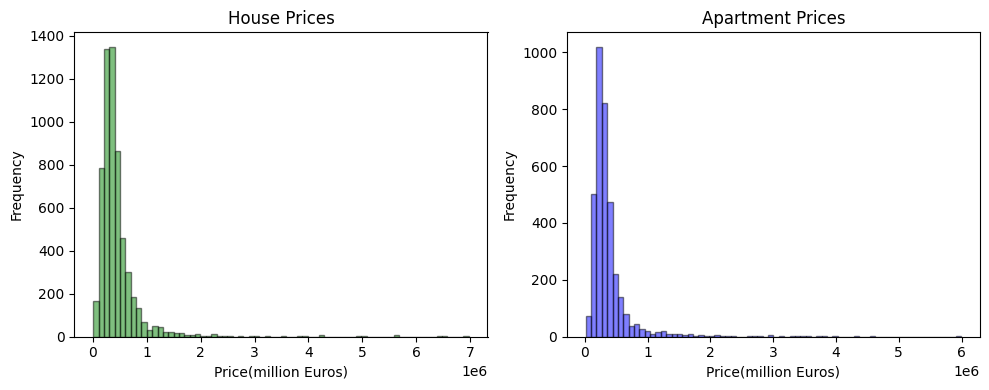

In [24]:
def Price_hist(df):

    # Filter the DataFrame for houses and apartments
    house_df = df[df['Type'] == 'house']
    apartment_df = df[df['Type'] == 'apartment']
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    # Plot histogram of house prices
    axs[0].hist(house_df['Price'], bins=70, edgecolor='black', color='green', alpha=0.5)
    axs[0].set_xlabel('Price(million Euros)')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('House Prices')
    # Plot histogram of apartment prices
    axs[1].hist(apartment_df['Price'], bins=70, edgecolor='black', color='blue', alpha=0.5)
    axs[1].set_xlabel('Price(million Euros)')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Apartment Prices')
    # Adjust the spacing between subplots
    plt.tight_layout()
    # plt.savefig(f'./charts/hist', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    return
Price_hist(df)

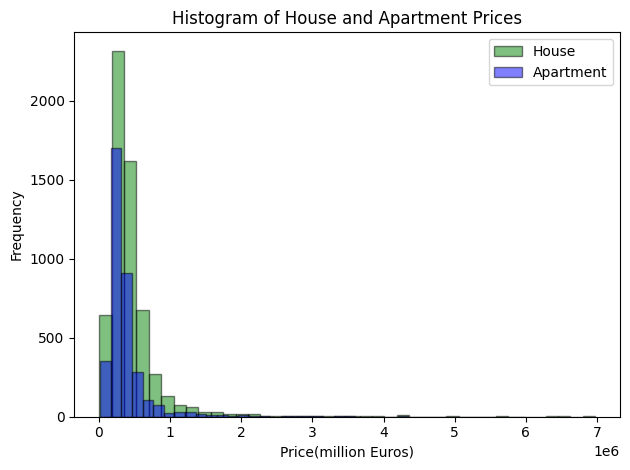

In [25]:
def house_apartment_hist(df):
    # Filter the DataFrame for houses and apartments
    house_df = df[df['Type'] == 'house']
    apartment_df = df[df['Type'] == 'apartment']
    # Plot histogram of house prices
    plt.hist(house_df['Price'], bins=40, edgecolor='black', color='green', alpha=0.5, label='House')
    # Plot histogram of apartment prices
    plt.hist(apartment_df['Price'], bins=40, edgecolor='black', color='blue', alpha=0.5, label='Apartment')
    # Set labels and title
    plt.xlabel('Price(million Euros)')
    plt.ylabel('Frequency')
    plt.title('Histogram of House and Apartment Prices')
    # Add a legend
    plt.legend()
    plt.tight_layout()
    # plt.savefig(f'./charts/house-apartment_hist', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    return
house_apartment_hist(df)

Next we will apply a logarithmic transformation to make our distribution looks more friendly, note that now it will look more normalized, and will lose it’s right side long tail.

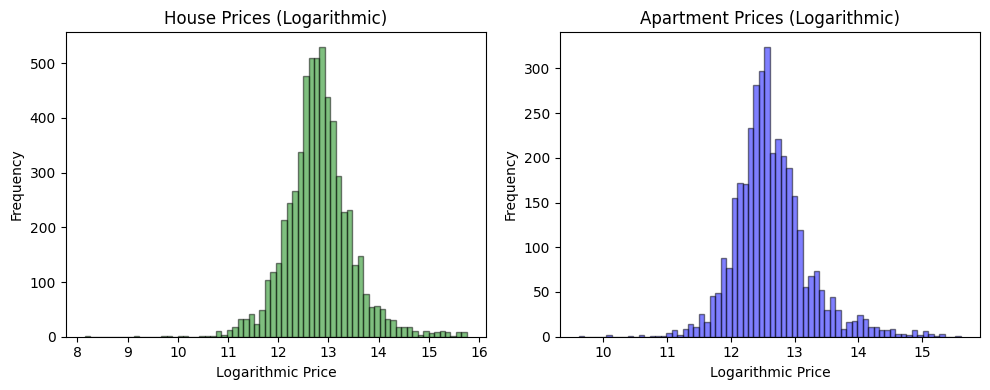

In [26]:
def Price_log(df):
    # Filter the DataFrame for houses and apartments
    house_df = df[df['Type'] == 'house']
    apartment_df = df[df['Type'] == 'apartment']
    # Apply logarithmic transformation to price values
    house_prices_log = np.log(house_df['Price'])
    apartment_prices_log = np.log(apartment_df['Price'])
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    # Plot histogram of logarithmic house prices
    axs[0].hist(house_prices_log, bins=70, edgecolor='black', color='green', alpha=0.5)
    axs[0].set_xlabel('Logarithmic Price')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('House Prices (Logarithmic)')
    # Plot histogram of logarithmic apartment prices
    axs[1].hist(apartment_prices_log, bins=70, edgecolor='black', color='blue', alpha=0.5)
    axs[1].set_xlabel('Logarithmic Price')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Apartment Prices (Logarithmic)')
    # Adjust the spacing between subplots
    plt.tight_layout()
    # plt.savefig('./charts/log', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    return
Price_log(df)

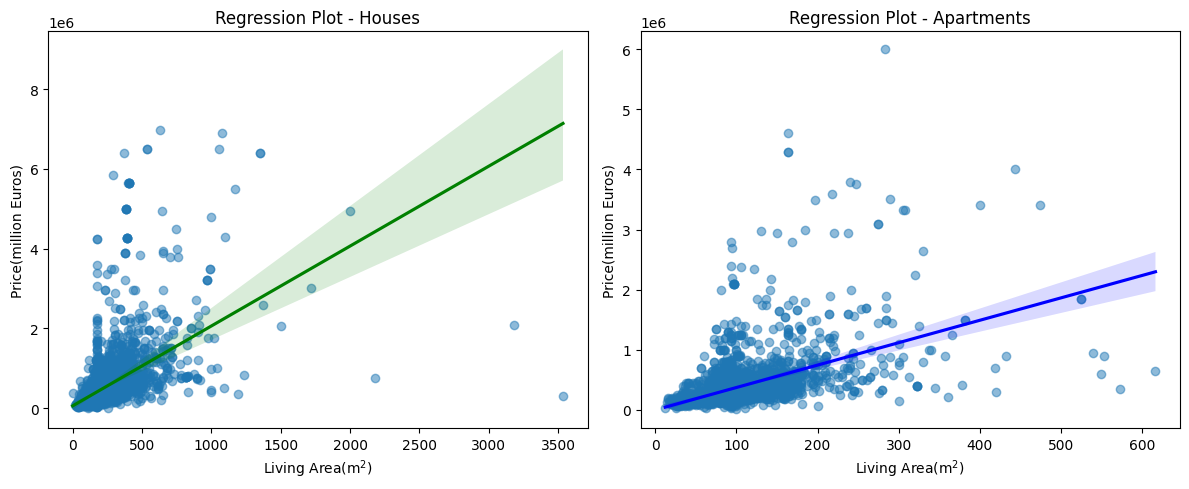

In [27]:
def Regression(df):
    # Filter the DataFrame for houses and apartments
    house_df = df[df['Type'] == 'house']
    apartment_df = df[df['Type'] == 'apartment']
    # Create a figure with a grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    # Create the regression plot for houses
    sns.regplot(x='Living_area', y='Price', data=house_df, ax=axes[0], scatter_kws={'alpha': 0.5}, line_kws={'color': 'green'})
    axes[0].set_xlabel('Living Area(m$^2$)')
    axes[0].set_ylabel('Price(million Euros)')
    axes[0].set_title('Regression Plot - Houses')
    # Create the regression plot for apartments
    sns.regplot(x='Living_area', y='Price', data=apartment_df, ax=axes[1], scatter_kws={'alpha': 0.5}, line_kws={'color': 'blue'})
    axes[1].set_xlabel('Living Area(m$^2$)')
    axes[1].set_ylabel('Price(million Euros)')
    axes[1].set_title('Regression Plot - Apartments')
    # Adjust the spacing between subplots
    plt.tight_layout()
    # plt.savefig('./charts/regression', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    return
Regression(df)    

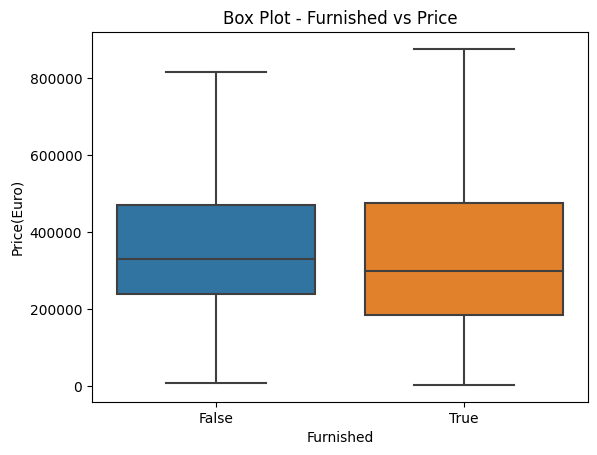

In [28]:
def Furnished_Price_boxplot(df):
    # Create a box plot using seaborn
    sns.boxplot(x='Furnished', y='Price', data=df, showfliers=False)
    # Set labels and title
    plt.xlabel('Furnished')
    plt.ylabel('Price(Euro)')
    plt.title('Box Plot - Furnished vs Price')
    # plt.savefig('./charts/furnished_price', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    return
Furnished_Price_boxplot(df)

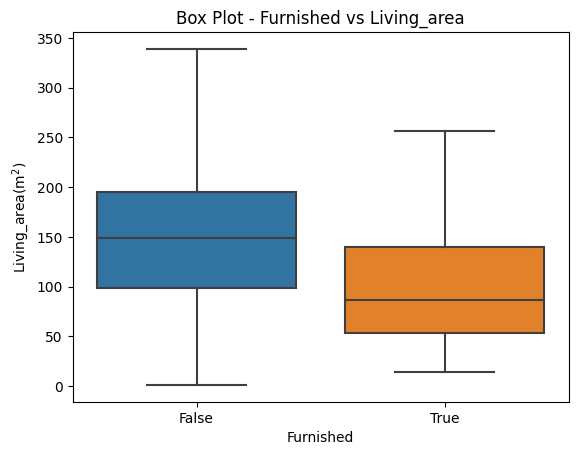

In [29]:
def Furnished_Area(df):
    # Create a box plot using seaborn
    sns.boxplot(x='Furnished', y='Living_area', data=df, showfliers=False)
    # Set labels and title
    plt.xlabel('Furnished')
    plt.ylabel('Living_area(m$^2$)')
    plt.title('Box Plot - Furnished vs Living_area')
    # plt.savefig('./charts/furnished_Living_area', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    return
Furnished_Area(df)

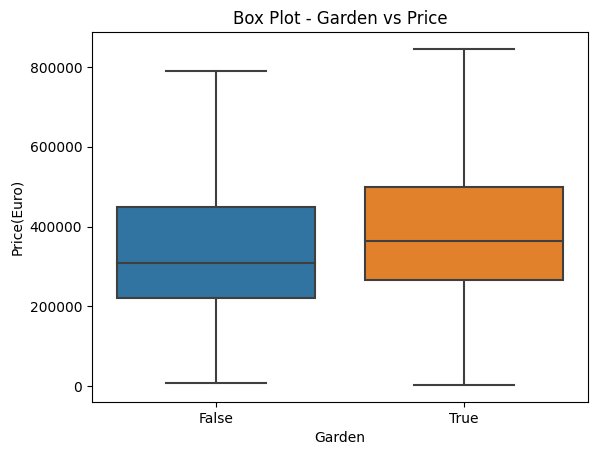

In [30]:
def Garden_boxplot(df):
    # Create a box plot using seaborn
    sns.boxplot(x='Garden', y='Price', data=df, showfliers=False)
    # Set labels and title
    plt.xlabel('Garden')
    plt.ylabel('Price(Euro)')
    plt.title('Box Plot - Garden vs Price')
    # plt.savefig('./charts/Garden_price', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    return
Garden_boxplot(df)

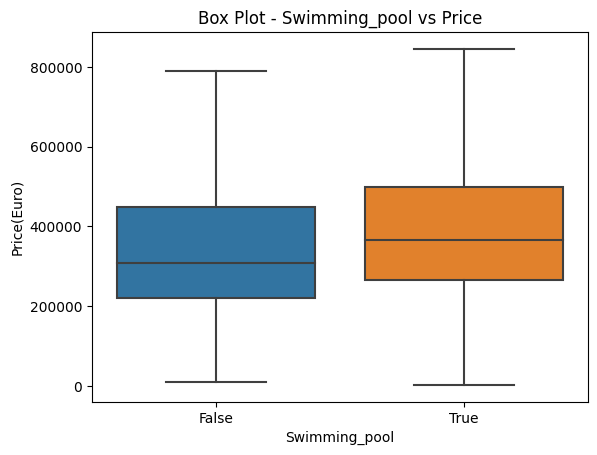

In [31]:
def Swimming_pool_boxplot(df):
    # Create a box plot using seaborn
    sns.boxplot(x='Garden', y='Price', data=df, showfliers=False)
    # Set labels and title
    plt.xlabel('Swimming_pool')
    plt.ylabel('Price(Euro)')
    plt.title('Box Plot - Swimming_pool vs Price')
    # plt.savefig('./charts/Swimming_pool_price', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    return  
Swimming_pool_boxplot(df)

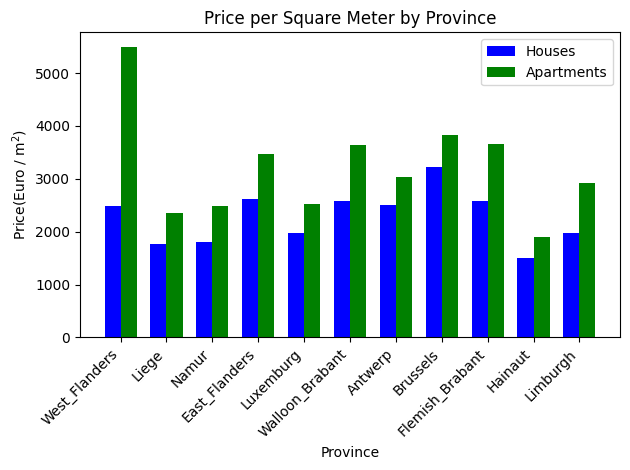

In [32]:
def house_and_partment_price_per_sqm(df):
    # Filter the DataFrame for houses and apartments separately
    house_df = df[df['Type'] == 'house']
    apartment_df = df[df['Type'] == 'apartment']

    # Get unique provinces
    provinces = df['province'].unique()

    # Calculate average price per square meter for houses and apartments in each province
    house_price_per_sqm = []
    apartment_price_per_sqm = []

    for province in provinces:
        house_price_per_sqm.append(house_df[house_df['province'] == province]['Price_per_sqm'].mean())
        apartment_price_per_sqm.append(apartment_df[apartment_df['province'] == province]['Price_per_sqm'].mean())

    # Set the width of the bars
    bar_width = 0.35

    # Set the x positions of the bars
    r1 = np.arange(len(provinces))
    r2 = [x + bar_width for x in r1]

    # Create the bar plot
    plt.bar(r1, house_price_per_sqm, color='blue', width=bar_width, label='Houses')
    plt.bar(r2, apartment_price_per_sqm, color='green', width=bar_width, label='Apartments')

    # Add labels, title, and legend
    plt.xlabel('Province')
    plt.ylabel('Price(Euro $/$ m$^2$)')
    plt.title('Price per Square Meter by Province')
    plt.xticks([r + bar_width/2 for r in range(len(provinces))], provinces, rotation=45, ha='right')
    plt.legend()

    # Display the plot
    plt.tight_layout()
    # plt.savefig('./charts/ouse_and_partment_price_per_sqm', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    return
house_and_partment_price_per_sqm(df)